# Pre Processing the Data set
In this page we shall get the data and pre process them in preparation in creating the app and learn how to distinguish a healthy leaves and a leaves that has mildew. 
The following are the steps:

## 1.Installing Kaggle

In [1]:
!pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.7/79.7 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 22.6 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.6.12-py3-none-any.whl size=102969 sha256=bcaa19bf1f75ee155bcd35ff48da687307a34734dc46ce42b058c4521146a8b5
  Stored in directory: /home/gitpod/.cache/pip/wheels/a0/87/83/f9893bb1660a03ca5808b7429e77808120f091569651323dd1
Successfully built kaggle


## 2. Downloading kaggle dataset

In [10]:
!kaggle datasets download -d codeinstitute/cherry-leaves

Dataset URL: https://www.kaggle.com/datasets/codeinstitute/cherry-leaves
License(s): unknown
cherry-leaves.zip: Skipping, found more recently modified local copy (use --force to force download)


## 3.Unzipping the file

In [18]:
import zipfile

with zipfile.ZipFile("cherry-leaves.zip", "r") as zip_ref:
    zip_ref.extractall("cherry-leaves")

## 1. Resizing the image files

In [10]:
from PIL import Image
import os

# Define directory paths
dataset_dirs = ["./cherry-leaves/cherry-leaves/healthy", "./cherry-leaves/cherry-leaves/powdery_mildew"]
output_dir = "./resized_data"

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Function to resize images and save them
def resize_and_save_image(image_path, output_path, new_size=(100, 100)):
    # Load image
    image = Image.open(image_path)
    
    # Resize image
    resized_image = image.resize(new_size)
    
    # Save resized image
    resized_image.save(output_path)

# Iterate through dataset directories
for dataset_dir in dataset_dirs:
    # Get category name from directory
    category = os.path.basename(dataset_dir)
    
    # Output directory for the current category
    output_category_dir = os.path.join(output_dir, category)
    os.makedirs(output_category_dir, exist_ok=True)
    
    # Iterate through files in the dataset directory
    for file in os.listdir(dataset_dir):
        if file.lower().endswith((".jpeg", ".jpg")):
            # Input and output paths
            input_path = os.path.join(dataset_dir, file)
            output_path = os.path.join(output_category_dir, file)
            
            # Resize image and save
            resize_and_save_image(input_path, output_path)


# DATA CLEANING
## Check and remove data that are not images

In [2]:
import os
import shutil

def remove_non_image_file(data_dir):
    image_extensions = ('.png', '.jpg', '.jpeg')
    for label in os.listdir(data_dir):
        label_dir = os.path.join(data_dir, label)
        if os.path.isdir(label_dir):
            for folder in os.listdir(label_dir):
                folder_path = os.path.join(label_dir, folder)
                if os.path.isdir(folder_path):
                    non_image_count = 0
                    for filename in os.listdir(folder_path):
                        file_path = os.path.join(folder_path, filename)
                        if not filename.lower().endswith(image_extensions):
                            if os.path.isfile(file_path):
                                os.remove(file_path)  # Remove non-image file
                            else:
                                shutil.rmtree(file_path)  # Remove directory
                            non_image_count += 1
                    print(f"Folder: {folder_path} - has non-image files: {non_image_count}")
    print("Data processing finished.")

# Call the function with the directory path
remove_non_image_file(data_dir='./cherry-leaves/cherry-leaves')



Data processing finished.


## 4. Calculate mean and standard deviation of a set of images. 

In [4]:
!pip install opencv-python


In [2]:
!sudo apt-get install libgl1-mesa-glx


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libgl1-mesa-glx


In [3]:
!pip install opencv-python-headless


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 53.9 MB/s eta 0:00:00:00:0100:01


In [ ]:
Calculate the mean and standard deviation

In [17]:
import os
os.environ['LD_LIBRARY_PATH'] = '/path/to/libGL.so.1:' + os.environ.get('LD_LIBRARY_PATH', '')
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Function to calculate mean and standard deviation of a set of images
def calculate_stats(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        images.append(img)
    images = np.array(images)
    mean = np.mean(images, axis=(0, 1, 2))
    std = np.std(images, axis=(0, 1, 2))
    return mean, std

# Paths to folders containing images
healthy_folder = 'cherry-leaves/healthy'
mildew_folder = 'cherry-leaves/powdery_mildew'

# Calculate statistics for healthy leaves
healthy_mean, healthy_std = calculate_stats(healthy_folder)

# Calculate statistics for powdery mildew leaves
mildew_mean, mildew_std = calculate_stats(mildew_folder)

# Plotting
labels = ['Red', 'Green', 'Blue']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, healthy_mean, width, label='Healthy', yerr=healthy_std, capsize=5)
rects2 = ax.bar(x + width/2, mildew_mean, width, label='Powdery Mildew', yerr=mildew_std, capsize=5)

ax.set_ylabel('Pixel Value')
ax.set_title('Mean and Standard Deviation of Leaf Images')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Print summary
print("Summary:")
print("Healthy Leaves - Mean:", healthy_mean, " Standard Deviation:", healthy_std)
print("Powdery Mildew Leaves - Mean:", mildew_mean, " Standard Deviation:", mildew_std)

plt.show()



FileNotFoundError: [Errno 2] No such file or directory: 'cherry-leaves/healthy'

## 5. Scatter Plot Matrix. To see the relationships between key features (e.g., size, color intensity) for both healthy and diseased cherry leaves.


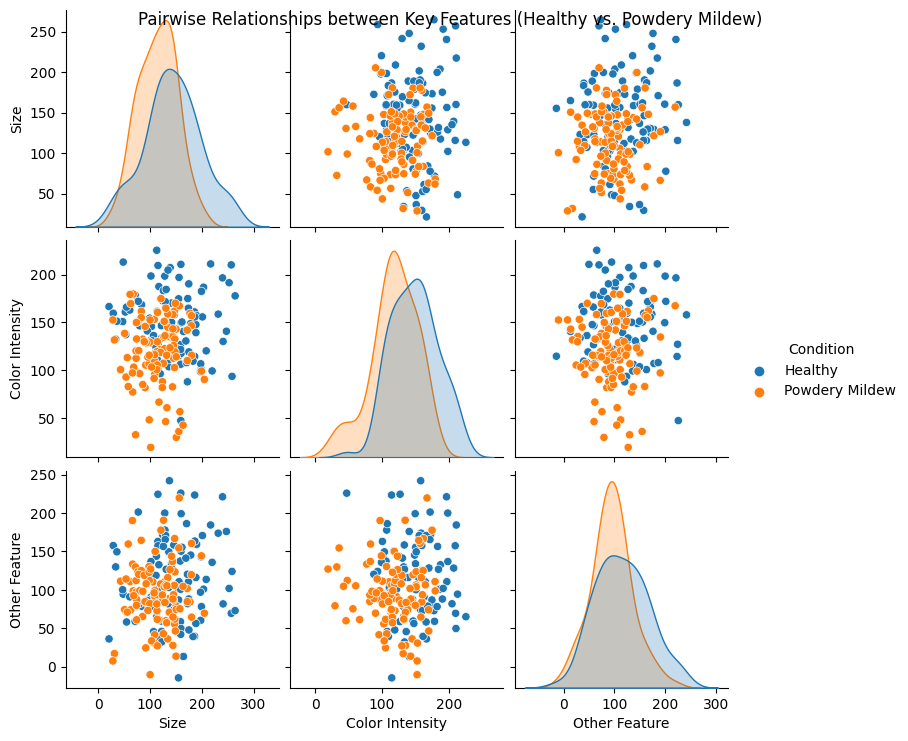

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Summary statistics
healthy_mean = np.array([138.65523108, 144.69453251, 121.62613779])
healthy_std = np.array([52.81307405, 35.16307886, 53.32607702])

mildew_mean = np.array([116.11770442, 123.17088945, 103.77318313])
mildew_std = np.array([36.91997604, 34.15072728, 42.99333244])

# Create synthetic data based on normal distribution
np.random.seed(0)
n_samples = 100
healthy_data = np.random.normal(loc=healthy_mean, scale=healthy_std, size=(n_samples, 3))
mildew_data = np.random.normal(loc=mildew_mean, scale=mildew_std, size=(n_samples, 3))

# Create DataFrame
df = pd.DataFrame(np.concatenate([healthy_data, mildew_data]),
                  columns=['Size', 'Color Intensity', 'Other Feature'])
df['Condition'] = ['Healthy'] * n_samples + ['Powdery Mildew'] * n_samples

# Interactive scatter plot matrix
sns.pairplot(df, hue='Condition')
plt.suptitle('Pairwise Relationships between Key Features (Healthy vs. Powdery Mildew)')
plt.show()


## 5. histograms overlaid with density plots. To compare between healthy and diseased leaves

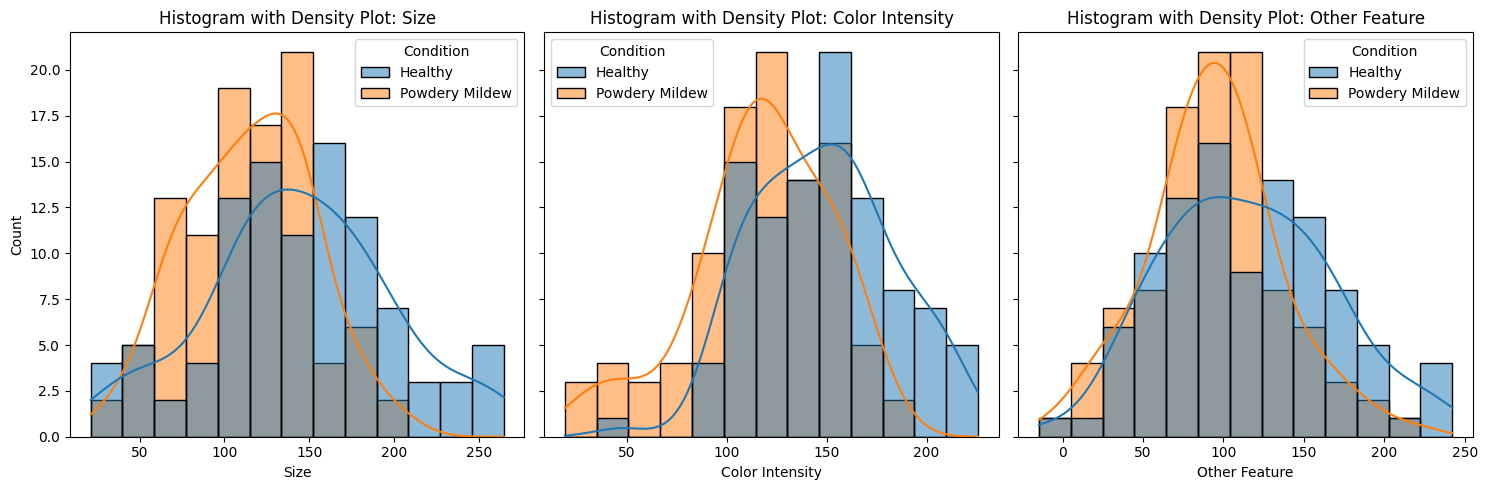

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Summary statistics
healthy_mean = np.array([138.65523108, 144.69453251, 121.62613779])
healthy_std = np.array([52.81307405, 35.16307886, 53.32607702])

mildew_mean = np.array([116.11770442, 123.17088945, 103.77318313])
mildew_std = np.array([36.91997604, 34.15072728, 42.99333244])

# Generate synthetic data based on normal distribution
np.random.seed(0)
n_samples = 100
healthy_data = np.random.normal(loc=healthy_mean, scale=healthy_std, size=(n_samples, 3))
mildew_data = np.random.normal(loc=mildew_mean, scale=mildew_std, size=(n_samples, 3))

# Create DataFrame
df = pd.DataFrame(np.concatenate([healthy_data, mildew_data]),
                  columns=['Size', 'Color Intensity', 'Other Feature'])
df['Condition'] = ['Healthy'] * n_samples + ['Powdery Mildew'] * n_samples

# Histograms overlaid with density plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
for i, feature in enumerate(['Size', 'Color Intensity', 'Other Feature']):
    sns.histplot(data=df, x=feature, hue='Condition', kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram with Density Plot: {feature}')
plt.tight_layout()
plt.show()


In [ ]:
Split Train Validation Set.

In [4]:
import os
import shutil
import random

def split_train_validation_test_images(my_data_dir, train_set_ratio, validation_set_ratio, test_set_ratio):
  
    if train_set_ratio + validation_set_ratio + test_set_ratio != 1.0:
        print("train_set_ratio + validation_set_ratio + test_set_ratio should sum 1.0")
        return

    # Ensure the target directories exist
    output_dir = "inputs"
    for folder in ['train', 'validation', 'test']:
        os.makedirs(os.path.join(output_dir, folder, 'healthy'), exist_ok=True)
        os.makedirs(os.path.join(output_dir, folder, 'powdery_mildew'), exist_ok=True)

    labels = ['healthy', 'powdery_mildew']

    for label in labels:
        files = os.listdir(os.path.join(my_data_dir, label))
        random.shuffle(files)

        train_set_files_qty = int(len(files) * train_set_ratio)
        validation_set_files_qty = int(len(files) * validation_set_ratio)

        count = 1
        for file_name in files:
            if count <= train_set_files_qty:
                # move given file to train set
                shutil.move(os.path.join(my_data_dir, label, file_name),
                            os.path.join(output_dir, 'train', label, file_name))
            elif count <= (train_set_files_qty + validation_set_files_qty):
                # move given file to validation set
                shutil.move(os.path.join(my_data_dir, label, file_name),
                            os.path.join(output_dir, 'validation', label, file_name))
            else:
                # move given file to test set
                shutil.move(os.path.join(my_data_dir, label, file_name),
                            os.path.join(output_dir, 'test', label, file_name))
            count += 1

        # Remove the original label directory
        os.rmdir(os.path.join(my_data_dir, label))

# Example usage:
split_train_validation_test_images("./cherry-leaves/cherry-leaves", 0.70, 0.10, 0.20)


Git Status

In [14]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   ../README.md
	deleted:    .ipynb_checkpoints/Notebook_Template-checkpoint.ipynb
	deleted:    .ipynb_checkpoints/Untitled-checkpoint.ipynb
	deleted:    .ipynb_checkpoints/Untitled1-checkpoint.ipynb
	modified:   DataCollection.ipynb
	modified:   DataModelling.ipynb
	modified:   DataVisualization.ipynb
	deleted:    Notebook_Template.ipynb
	deleted:    Untitled.ipynb
	deleted:    Untitled1.ipynb
	deleted:    validation_data/test/healthy/0008f3d3-2f85-4973-be9a-1b520b8b59fc___JR_HL 4092_flipTB.JPG
	deleted:    validation_data/test/healthy/0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765.JPG
	deleted:    validation_data/test/healthy/0086a8c7-1440-423e-939d-d0567b1fc4e4___JR_HL 4277_flipTB.JPG
	deleted:    validation_data/test/healthy/011f07d1-8813-4a63-

Git Add

In [15]:
!git add .

Git Commit

In [16]:
!git commit -am "clean and resized the data and created a training, validation and test data set "

[main 0a4bcc9] clean and resized the data and created a training, validation and test data set
 4218 files changed, 225 insertions(+), 1112 deletions(-)
 delete mode 100644 jupyter_notebooks/.ipynb_checkpoints/Notebook_Template-checkpoint.ipynb
 delete mode 100644 jupyter_notebooks/.ipynb_checkpoints/Untitled-checkpoint.ipynb
 delete mode 100644 jupyter_notebooks/.ipynb_checkpoints/Untitled1-checkpoint.ipynb
 delete mode 100644 jupyter_notebooks/Notebook_Template.ipynb
 delete mode 100644 jupyter_notebooks/Untitled.ipynb
 delete mode 100644 jupyter_notebooks/Untitled1.ipynb
 rename jupyter_notebooks/{validation_data/train => inputs/test}/healthy/0008f3d3-2f85-4973-be9a-1b520b8b59fc___JR_HL 4092_180deg.JPG (100%)
 rename jupyter_notebooks/{validation_data => inputs}/test/healthy/0008f3d3-2f85-4973-be9a-1b520b8b59fc___JR_HL 4092_flipTB.JPG (100%)
 rename jupyter_notebooks/{validation_data => inputs}/test/healthy/0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765.JPG (100%)
 rename jupyter

Git Push

In [17]:
!git push


Enumerating objects: 4231, done.
Counting objects: 100% (4231/4231), done.
Delta compression using up to 16 threads
Compressing objects: 100% (4225/4225), done.
Writing objects: 100% (4225/4225), 9.65 MiB | 11.45 MiB/s, done.
Total 4225 (delta 5), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (5/5), completed with 5 local objects.
To https://github.com/elena5875/project5_cherryleaves.git
   d69a944..0a4bcc9  main -> main
